# `Dados vs Informação:`

``Dados`` são fatos brutos e sem contexto, geralmente em formato numérico ou alfanumérico. Eles são a representação simbólica de algo que pode ser registrado, armazenado e processado por meio de tecnologias de informação. Os dados podem ser coletados a partir de diversas fontes, como sensores, sistemas de informação, formulários, pesquisas, entre outros. Um exemplo de dados são os números de vendas de uma loja ao longo de um mês.

``Informações`` são dados que foram organizados, interpretados e transformados em algo significativo e útil. Ou seja, a informação é o resultado do processamento dos dados, que foram analisados e transformados em conhecimento. As informações têm significado e contexto, e podem ser utilizadas para a tomada de decisões. Continuando com o exemplo anterior, uma informação que poderia ser extraída dos dados de vendas é a conclusão de que o produto X é o mais vendido na loja.

Portanto, podemos dizer que dados são os elementos mais básicos da informação, e que as informações são dados organizados e interpretados que possuem valor e significado para o usuário final. A mineração de dados é justamente o processo de transformar dados em informações úteis, aplicando técnicas de tratamento,análise e interpretação de dados.

Para isto, existem algumas etapas a serem realizadas:
- Análise dos dados;
- Tratamento dos dados;
- Aplicação em algum algoritmo de machine learning;
- Interpretar os resultados.

# 1 - Análise dos dados

Esta parte é fundamental para entender o que os dados representam, o tipo dos dados, informações descritivas da base de dados, valores nulos...

- 1 - Analisar as primeiras linhas da base de dados para entender quais as colunas e a forma dos valores;
- 2 - Analisar o tipo de dados das colunas;
- 3 - Analisar informações descritivas das colunas numéricas e textuais;
- 4 - Analisar a quantidade/porcentagem de valores nulos em cada coluna;
- 5 - Verificar informações a respeito de valores nulos das colunas com valores núlos ou textuais;

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Leitura da base de Dados
df = pd.read_csv('olimpiadas_1972.csv')

1

In [3]:
df.head(3)

,ano,cidade,esporte,disciplina,atleta,pais,genero,evento,medalha
0,1972.0,munique,aquatics,saltos ornamentais,"CAGNOTTO, Giorgio Franco",ITA,homens,10M Platform,bronze
1,1972.0,munique,NaN,saltos ornamentais,"DIBIASI, Klaus",ITA,homens,10M Platform,ouro
2,1972.0,munique,aquatics,saltos ornamentais,"RYDZE, Richard Anthony",USA,homens,10M Platform,prateado


2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ano         1086 non-null   float64
 1   cidade      1185 non-null   object 
 2   esporte     1173 non-null   object 
 3   disciplina  1185 non-null   object 
 4   atleta      1185 non-null   object 
 5   pais        1185 non-null   object 
 6   genero      1185 non-null   object 
 7   evento      1185 non-null   object 
 8   medalha     1185 non-null   object 
dtypes: float64(1), object(8)
memory usage: 83.4+ KB


3

In [5]:
# Informações descritivas das colunas numéricas
df.describe()

,ano
count,1086.0
mean,1972.0
std,0.0
min,1972.0
25%,1972.0
50%,1972.0
75%,1972.0
max,1972.0


In [6]:
# Informações descritivas das colunas textuais
df.describe(include = 'O')

,cidade,esporte,disciplina,atleta,pais,genero,evento,medalha
count,1185,1173,1185,1185,1185,1185,1185,1185
unique,1,20,28,1053,48,2,143,3
top,munique,aquatics,automobilismo,"SPITZ, Mark",URS,homens,Volleyball,bronze
freq,1185,165,150,7,211,947,71,412


4

In [7]:
# Quantidade de valores nulos por coluna
df.isna().sum()

ano           99
cidade         0
esporte       12
disciplina     0
atleta         0
pais           0
genero         0
evento         0
medalha        0
dtype: int64

In [8]:
# Porcentagem de valores nulos por coluna
df.isna().sum() * 100 / len(df)

ano           8.354430
cidade        0.000000
esporte       1.012658
disciplina    0.000000
atleta        0.000000
pais          0.000000
genero        0.000000
evento        0.000000
medalha       0.000000
dtype: float64

In [9]:
# Porcentagem arredondada para 2 casas decimais de valores nulos por coluna
round(df.isna().sum() * 100 / len(df), 2)

ano           8.35
cidade        0.00
esporte       1.01
disciplina    0.00
atleta        0.00
pais          0.00
genero        0.00
evento        0.00
medalha       0.00
dtype: float64

5

In [10]:
# Quantidade de valores únicos da coluna ano
df.ano.nunique()

1

In [11]:
# valores únicos da coluna ano
df.ano.unique()

array([1972.,   nan])

In [12]:
# quantidade de aparições dps valores únicos da coluna ano
df.ano.value_counts()

ano
1972.0    1086
Name: count, dtype: int64

In [13]:
# Quantidade de valores únicos da coluna esporte
df.esporte.nunique()

20

In [14]:
# valores únicos da coluna esporte
df.esporte.unique()

array(['aquatics', nan, 'atletismo', 'automobilismo', 'basquetebol',
       'boxing', 'canoa e caiaque', 'ciclismo', 'equestres', 'esgrima',
       'futebol', 'ginástica', 'andebol', 'hóquei', 'judô',
       'pentatlo moderno', 'remo', 'travessia', 'tiroteio', 'voleibol',
       'levantamento de peso'], dtype=object)

In [15]:
# quantidade de aparições dps valores únicos da coluna esporte
df.esporte.value_counts()

esporte
aquatics                165
automobilismo           150
voleibol                131
remo                     78
ginástica                72
esgrima                  71
futebol                  70
canoa e caiaque          54
hóquei                   47
andebol                  45
boxing                   44
equestres                42
travessia                39
ciclismo                 37
basquetebol              36
levantamento de peso     27
tiroteio                 24
judô                     23
pentatlo moderno         12
atletismo                 6
Name: count, dtype: int64

# 2 - Tratamento de Dados

Nesta parte fazemos:
* 1 - Tratamento de valores núlos:
    - Nas colunas com tipo de dados numéricos, podemos utilizar 3 abordagens:
        * 1 - Se forem poucos dados nulos, apagar os registros com estes dados;
        * 2 - Se for uma quantidade considerável de dados podemos:
            * 2.1 - Substituir os valores nulos pela média da coluna;
            * 2.1 - Substituir os valores nulos pela mediana da coluna;
            * 2.1 - Substituir os valores nulos pela moda da coluna.
        * 3 - Se forem muitos dados nulos, apagar a coluna.

    - Nas colunas com tipo de dados textual, podemos utilizar 3 abordagens:
        * 1 - Se forem poucos dados nulos, apagar os registros com estes dados;
        * 2 - Se for uma quantidade considerável de dados podemos substituir os valores nulos pela moda da coluna;
        * 3 - Se forem muitos dados nulos, apagar a coluna.

        O que é média, mediana e moda:
        * Média - é a soma de todos os valores, dividido pela quantidade de valores somados
        * Mediana - considerando a lista de valores em ordem crescente, é o valor central da lista
        * Moda - é o valor que mais aparece na coluna

* 2 - Converter valores textuais em numéricos;
* 3 - Normalizar os dados

1

In [16]:
# Retorna a moda da coluna ano
df.ano.mode()[0]

1972.0

In [17]:
# Retorna todos os registros com valores núlos na coluna ano
df.loc[df['ano'].isna()]

,ano,cidade,esporte,disciplina,atleta,pais,genero,evento,medalha
25,NaN,munique,aquatics,natação,"SPITZ, Mark",USA,homens,100M Butterfly,ouro
31,NaN,munique,aquatics,natação,"SPITZ, Mark",USA,homens,100M Freestyle,ouro
112,NaN,munique,aquatics,natação,"STAMM, Michael Eugene",USA,homens,4X100M Medley Relay,ouro
157,NaN,munique,aquatics,pólo aquático,"DOLGUSHIN, Aleksandr",URS,homens,Water Polo,ouro
181,NaN,munique,atletismo,atletismo,"WILBER, Doreen Viola Hansen",USA,mulheres,Individual Fita Round,ouro
...,...,...,...,...,...,...,...,...,...
818,NaN,munique,hóquei,hóquei,"BAUMGART, Wolfgang",FRG,homens,Hockey,ouro
836,NaN,munique,hóquei,hóquei,"ABDUL, Rashid III",PAK,homens,Hockey,prateado
855,NaN,munique,judô,judô,"ONASHVILI, Givi",URS,homens,+ 93KG (Heavyweight),bronze
873,NaN,munique,judô,judô,"KUZNETSOV, Vitali",URS,homens,Open Category,prateado


In [18]:
# Acrescenta a móda da coluna ano na coluna ano nos registros em que são núlos na coluna ano
df.loc[df['ano'].isna(), 'ano'] = df.ano.mode()[0]

In [19]:
# Retorna a moda da coluna esporte
df.esporte.mode()[0]

'aquatics'

In [20]:
# Retorna todos os registros com valores núlos na coluna esporte
df.loc[df['esporte'].isna()]

,ano,cidade,esporte,disciplina,atleta,pais,genero,evento,medalha
1,1972.0,munique,NaN,saltos ornamentais,"DIBIASI, Klaus",ITA,homens,10M Platform,ouro
6,1972.0,munique,NaN,saltos ornamentais,"LINCOLN, Craig Howard",USA,homens,3M Springboard,bronze
15,1972.0,munique,NaN,natação,"ATWOOD, Susanne Jean",USA,mulheres,100M Backstroke,bronze
22,1972.0,munique,NaN,natação,"CARR, Catherine L.",USA,mulheres,100M Breaststroke,ouro
34,1972.0,munique,NaN,natação,"NEILSON, Alexandra Lynn",USA,mulheres,100M Freestyle,ouro
45,1972.0,munique,NaN,natação,"TAGUCHI, Nobutaka",JPN,homens,200M Breaststroke,bronze
53,1972.0,munique,NaN,natação,"HALL, Gary Wayne",USA,homens,200M Butterfly,prateado
66,1972.0,munique,NaN,natação,"VIDALI, Lynn Marie",USA,mulheres,200M Individual Medley,bronze
79,1972.0,munique,NaN,natação,"NEALL, Gail",AUS,mulheres,400M Individual Medley,ouro
87,1972.0,munique,NaN,natação,"MURPHY, John Joseph",USA,homens,4X100M Freestyle Relay,ouro


In [21]:
# Acrescenta a móda da coluna ano na coluna ano nos registros em que são núlos na coluna esporte
df.loc[df['esporte'].isna(), 'esporte'] = df.esporte.mode()[0]

In [22]:
df.isna().sum()

ano           0
cidade        0
esporte       0
disciplina    0
atleta        0
pais          0
genero        0
evento        0
medalha       0
dtype: int64

2 temos basicamente duas formas de converter valores textuais em numéricos:
- Usar o loc para substituir os valores (neste caso pode ser preciso alterar o tipo de dados da coluna)
- Usar a biblioteca label Encoder

``Label Encoding``: É uma técnica que consiste em atribuir um valor numérico a cada categoria de uma variável categórica. Por exemplo, podemos atribuir o valor 0 para a categoria "masculino" e o valor 1 para a categoria "feminino" na coluna "genero".

In [23]:
# Criação do objeto LabelEncoder
le = LabelEncoder()

In [24]:
# Aplicação do LabelEncoder nas colunas desejadas
df['cidade'] = le.fit_transform(df['cidade'])
df['esporte'] = le.fit_transform(df['esporte'])
df['disciplina'] = le.fit_transform(df['disciplina'])
df['atleta'] = le.fit_transform(df['atleta'])
df['pais'] = le.fit_transform(df['pais'])
df['evento'] = le.fit_transform(df['evento'])
df['medalha'] = le.fit_transform(df['medalha'])

In [25]:
le.classes_

array(['bronze', 'ouro', 'prateado'], dtype=object)

In [26]:
df.head()

,ano,cidade,esporte,disciplina,atleta,pais,genero,evento,medalha
0,1972.0,0,1,22,126,22,homens,14,0
1,1972.0,0,1,22,192,22,homens,14,1
2,1972.0,0,1,22,780,46,homens,14,2
3,1972.0,0,1,22,368,16,mulheres,14,0
4,1972.0,0,1,22,455,40,mulheres,14,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ano         1185 non-null   float64
 1   cidade      1185 non-null   int64  
 2   esporte     1185 non-null   int64  
 3   disciplina  1185 non-null   int64  
 4   atleta      1185 non-null   int64  
 5   pais        1185 non-null   int64  
 6   genero      1185 non-null   object 
 7   evento      1185 non-null   int64  
 8   medalha     1185 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 83.4+ KB


In [28]:
df.genero.unique()

array(['homens', 'mulheres'], dtype=object)

In [29]:
# Substitui o valor homens por 0
df.loc[df['genero']=='homens', 'genero'] = 0
# Substitui o valor mulheres por 1
df.loc[df['genero']=='mulheres', 'genero'] = 1

# Altera o tipo de dados da coluna de object para int
df['genero'] = df['genero'].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ano         1185 non-null   float64
 1   cidade      1185 non-null   int64  
 2   esporte     1185 non-null   int64  
 3   disciplina  1185 non-null   int64  
 4   atleta      1185 non-null   int64  
 5   pais        1185 non-null   int64  
 6   genero      1185 non-null   int64  
 7   evento      1185 non-null   int64  
 8   medalha     1185 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 83.4 KB


Repare que a coluna ano está como fload (número com casas decimais). Não é algo extremamente necessário, mas como é uma coluna que só possui valores interiros, vamos alterar o tipo de dados dela também.

In [31]:
# Altera o tipo de dados da coluna de float para int
df['ano'] = df['ano'].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ano         1185 non-null   int64
 1   cidade      1185 non-null   int64
 2   esporte     1185 non-null   int64
 3   disciplina  1185 non-null   int64
 4   atleta      1185 non-null   int64
 5   pais        1185 non-null   int64
 6   genero      1185 non-null   int64
 7   evento      1185 non-null   int64
 8   medalha     1185 non-null   int64
dtypes: int64(9)
memory usage: 83.4 KB


3 Neste ponto da normalização é importante saber o que deseja fazer.
- Se for um algorítmo ``não supervisionado`` (clusterização), devemos normalizar todas as colunas;
- Se for um algorítmo supervisionado, temos duas opções:
    - Em uma regressão, normalizar todas as colunas;
    - Em uma classificação, normalizar todas as colunas de atributos (não normaliza o nosso alvo)

Neste caso, poderíamos tanto aplicar uma clusterização para identificar padrões na base, como também podemos aplicar uma classificação para prever qual a medalha.

In [33]:
# Retorna a base de dados sem a coluna medalha (mas sem apagar definitivamente esta coluna)
df.drop('medalha', axis=1)

,ano,cidade,esporte,disciplina,atleta,pais,genero,evento
0,1972,0,1,22,126,22,0,14
1,1972,0,1,22,192,22,0,14
2,1972,0,1,22,780,46,0,14
3,1972,0,1,22,368,16,1,14
4,1972,0,1,22,455,40,1,14
...,...,...,...,...,...,...,...,...
1180,1972,0,19,27,751,45,0,71
1181,1972,0,19,27,164,47,0,71
1182,1972,0,19,27,443,19,0,73
1183,1972,0,19,27,577,38,0,73


In [34]:
X = df.drop('medalha', axis=1)

# Cria um objeto MinMaxScaler e ajusta aos dados selecionados
scaler = MinMaxScaler()
scaler.fit(X)

# Aplica a normalização aos dados selecionados
X = scaler.transform(X)

# Cria uma lista com os valores da coluna medalha
y = df[['medalha']].values

In [35]:
from keras.utils import to_categorical

# converte y para one-hot-encoded
y_one_hot = to_categorical(y)

In [36]:
y_one_hot

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [37]:
y

array([[0],
       [1],
       [2],
       ...,
       [0],
       [1],
       [2]])

# 3 - Aplicação de algoritmo de machine learning

In [38]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.15, random_state=71)

In [40]:
!pip install plotly

In [41]:
model = Sequential()
# No input_shape, a quantidade de atributos que possuimos
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='relu'))
# Na camada de saida de uma classificação, usamos 1 neurônio para cada classe possível e softmax
model.add(Dense(3, activation='softmax'))
# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.15)

Epoch 1/1000
27/27 [==============================] - 3s 22ms/step - loss: 1.1019 - accuracy: 0.3298 - val_loss: 1.0997 - val_accuracy: 0.2697
Epoch 2/1000
27/27 [==============================] - 0s 7ms/step - loss: 1.0983 - accuracy: 0.3392 - val_loss: 1.0995 - val_accuracy: 0.2961
Epoch 3/1000
27/27 [==============================] - 0s 6ms/step - loss: 1.0968 - accuracy: 0.3708 - val_loss: 1.1025 - val_accuracy: 0.3355
Epoch 4/1000
27/27 [==============================] - 0s 5ms/step - loss: 1.0964 - accuracy: 0.3474 - val_loss: 1.0996 - val_accuracy: 0.3618
Epoch 5/1000
27/27 [==============================] - 0s 6ms/step - loss: 1.0920 - accuracy: 0.3801 - val_loss: 1.0926 - val_accuracy: 0.4211
Epoch 6/1000
27/27 [==============================] - 0s 5ms/step - loss: 1.0900 - accuracy: 0.3848 - val_loss: 1.1039 - val_accuracy: 0.3618
Epoch 7/1000
27/27 [==============================] - 0s 13ms/step - loss: 1.0878 - accuracy: 0.4000 - val_loss: 1.0946 - val_accuracy: 0.3882
Epoc

In [42]:
# Retorna um dicionário com algumas métricas do treinamento
history.history

{'loss': [1.1019295454025269,
  1.0983235836029053,
  1.096785306930542,
  1.0964332818984985,
  1.092029333114624,
  1.0899994373321533,
  1.0877634286880493,
  1.0849484205245972,
  1.0809627771377563,
  1.06929349899292,
  1.0795339345932007,
  1.0704360008239746,
  1.063670039176941,
  1.0559089183807373,
  1.0516741275787354,
  1.0443322658538818,
  1.0305365324020386,
  1.0248937606811523,
  1.0127389430999756,
  1.0247693061828613,
  0.9980793595314026,
  0.9859963655471802,
  0.9630383849143982,
  0.9680430889129639,
  0.9790295958518982,
  0.9485112428665161,
  0.943215012550354,
  0.9260348081588745,
  0.8962123990058899,
  0.8901421427726746,
  0.8754487037658691,
  0.8742802739143372,
  0.8731112480163574,
  0.8749470114707947,
  0.8590940237045288,
  0.8556786179542542,
  0.8430269360542297,
  0.8363635540008545,
  0.8492854237556458,
  0.8191115856170654,
  0.8136711716651917,
  0.8088302612304688,
  0.819754421710968,
  0.7869682312011719,
  0.7769429683685303,
  0.74843

In [43]:
# Retorna as chaves do dicionário
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# 4 - interpretar resultados

In [44]:
import plotly.offline as py
import plotly.graph_objs as go

# Define a função que plota o gráfico
def grafico(x_val, valy, namey, titulo, x_name, y_name, save):
    # Verifica se x_val é uma lista vazia
    if len(x_val) == 0:
        # Cria uma lista com o número de elementos na primeira lista de valy
        x_val = [x for x in range(1,len(valy[0])+1)]
    # Inicializa a lista de dados
    data = []
    # Define as cores para cada conjunto de dados
    cores = ['#DC143C','#FFB90F','#0000FF','#006400','#00FFFF','#8B008B']
    # Percorre cada conjunto de dados em valy
    for cont in range(0,len(valy)):
        # Adiciona um novo conjunto de dados na lista 'data'
        data.append(go.Scatter(x = x_val,
                    y = valy[cont],
                    mode = 'lines',
                    name = namey[cont],
                    marker = {'color': cores[cont]}))
    # Define as configurações do layout do gráfico
    layout = go.Layout(title = f'{titulo}', title_x=0.5,
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#000000'},
                   xaxis = {'title': x_name},
                   yaxis = {'title': y_name},
                   paper_bgcolor = 'rgb(188, 231, 245)',
                   plot_bgcolor = 'rgb(188, 231, 245)')
    # Cria um objeto 'Figure' do plotly com os dados e o layout
    fig = go.Figure(data=data, layout=layout)
    # Define as configurações para a legenda
    fig.update_layout(legend=dict(
    orientation="h",
    yanchor="top",
    entrywidth=200,
    y=1.15,
    xanchor="right",
    x=1,
    bgcolor = 'rgba(188, 231, 245,0.8)'
    ),
    font=dict(
            size=15,
            color="black"
        ))
    # Verifica se o parâmetro 'save' é True
    if save == True:
        # Salva o gráfico como uma imagem SVG e um arquivo HTML
        fig.write_image(f"grafico/{titulo}.svg", scale=1, width=1000, height=500)
        fig.write_html(f"grafico/{titulo}.html")
    # Verifica se o parâmetro 'save' é False
    if save == False:
        # Renderiza o gráfico na tela
        py.iplot(fig)


In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

valor_y = [loss, val_loss, accuracy, val_accuracy]
name_y = ['loss','val loss', 'accuracy', 'val_accuracy']


grafico([], valor_y, name_y, 'Treinamento', 'Epoch', 'Loss', False)

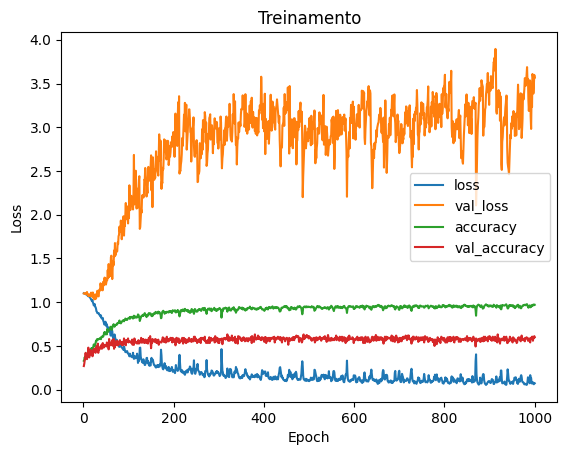

In [46]:
import matplotlib.pyplot as plt

grafico_x = [x for x in range(1,len(val_accuracy)+1)]

plt.plot(grafico_x, loss, label='loss')
plt.plot(grafico_x, val_loss, label='val_loss')
plt.plot(grafico_x, accuracy, label='accuracy')
plt.plot(grafico_x, val_accuracy, label='val_accuracy')

plt.title('Treinamento')
plt.legend()

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [47]:
# calcular a acurácia
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia: {accuracy}")

6/6 [==============================] - 0s 5ms/step - loss: 3.7566 - accuracy: 0.5618
Acurácia: 0.5617977380752563


6/6 [==============================] - 0s 4ms/step


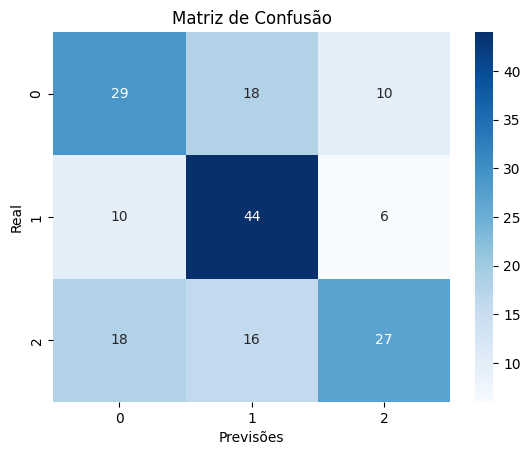

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# fazer previsões com o modelo
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# plotar o heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.show()